In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1=pd.read_excel('/content/drive/MyDrive/data.xlsx')

In [5]:
df2=pd.read_excel('/content/drive/MyDrive/variable description.xlsx')

In [6]:
df3=pd.read_excel('/content/drive/MyDrive/Country-Code.xlsx')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     19 non-null     object
 1   Description  19 non-null     object
dtypes: object(2)
memory usage: 432.0+ bytes


In [9]:
df2

,Variable,Description
0,Restaurant ID,Identification Number
1,Restaurant Name,Name Of the Restaurant
2,Country Code,Country code
3,City,City Name of the Restaurant
4,Address,Detailed address of the restaurant
5,Locality,Shot Address Of the Restaurant
6,Locality Verbose,Long Address of the Restaurant
7,Longitude,Longitude
8,Latitude,Latitude
9,Cuisines,Types Of Cuisines Served


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


**df2 and df3 is clean.df1 needs  little cleaning**
1. Cleaning
---



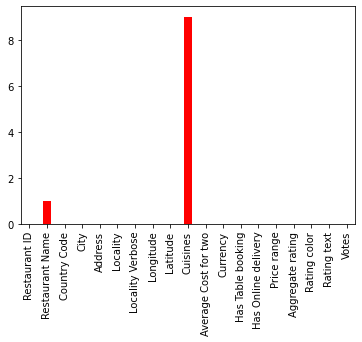

In [11]:
df1.isnull().sum().plot(kind='bar',color='red')


In [12]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df1["Restaurant Name"]=df1["Restaurant Name"].fillna(df1["Restaurant Name"].mode()[0])
df1["Cuisines"]=df1["Cuisines"].fillna(df1["Cuisines"].mode()[0])

In [14]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

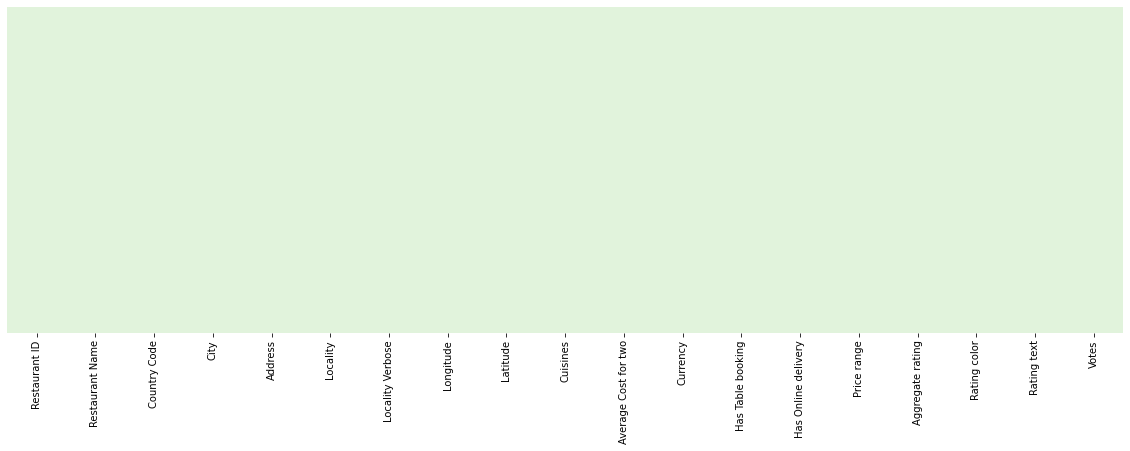

In [15]:
colormap = sns.color_palette("Greens")
plt.rcParams['figure.figsize']=(20,6)
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap=colormap)

**Null Values from column "Restaurant Name" AND Cuisines has been replaced with the mode of the columns since both the columns  have categorial variable**

*1.Explore the geographical distribution of the restaurants, finding out the 
cities with maximum / minimum number of restaurants.*

In [16]:
df=df1.merge(df3,on='Country Code',how='left')
#merging with df3 to get the country name

In [17]:
b=df.groupby(["Country"]).agg({ "Restaurant ID" : "count"}).reset_index().rename({"Restaurant ID" :"No. of Restaurant"},axis='columns').sort_values(by='No. of Restaurant',ascending=False)
b=b.head(5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


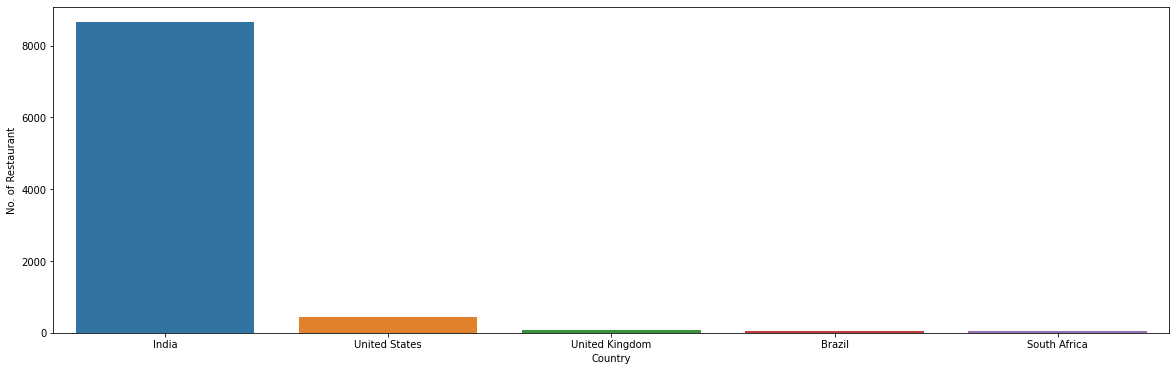

In [18]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot("Country","No. of Restaurant",data=b)

([<matplotlib.patches.Wedge at 0x7f187fc978d0>,
 [Text(-2.14958641544394, 0.4682715478639219, 'India'),
  Text(2.113007155070432, -0.6125363357558145, 'United States'),
  Text(2.187120187817026, -0.237708401288674, 'United Kingdom'),
  Text(2.1959220340232783, -0.13388958320597136, 'Brazil'),
  Text(2.1995467728848292, -0.04465415873057457, 'South Africa')],
 [Text(-1.1725016811512399, 0.2554208442894119, '93.17%'),
  Text(1.1525493573111445, -0.3341107285940806, '4.67%'),
  Text(1.192974647900196, -0.12965912797564036, '0.86%'),
  Text(1.197775654921788, -0.07303068174871163, '0.65%'),
  Text(1.1997527852099066, -0.024356813853040674, '0.65%')])

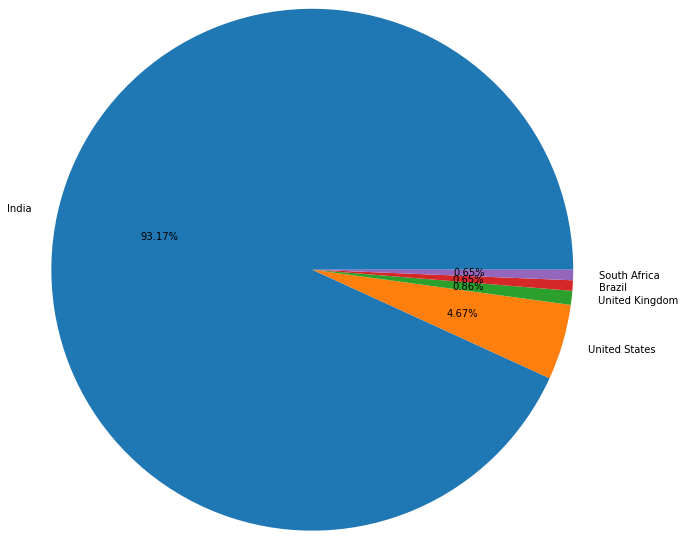

In [19]:
plt.rcParams['figure.figsize']=(20,6)
plt.pie(b["No. of Restaurant"],labels=b["Country"],autopct='%1.2f%%',radius=2)

In [21]:
#checking distribution at more granular level(City)
a=df.groupby(["City"]).agg({ "Restaurant ID" : "count"}).reset_index().rename({"Restaurant ID" :"No. of Restaurant"},axis='columns').sort_values(by='No. of Restaurant',ascending=False)
a

,City,No. of Restaurant
88,New Delhi,5473
50,Gurgaon,1118
89,Noida,1080
43,Faridabad,251
48,Ghaziabad,25
...,...,...
37,Dicky Beach,1
68,Lorn,1
107,Quezon City,1
66,Lincoln,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


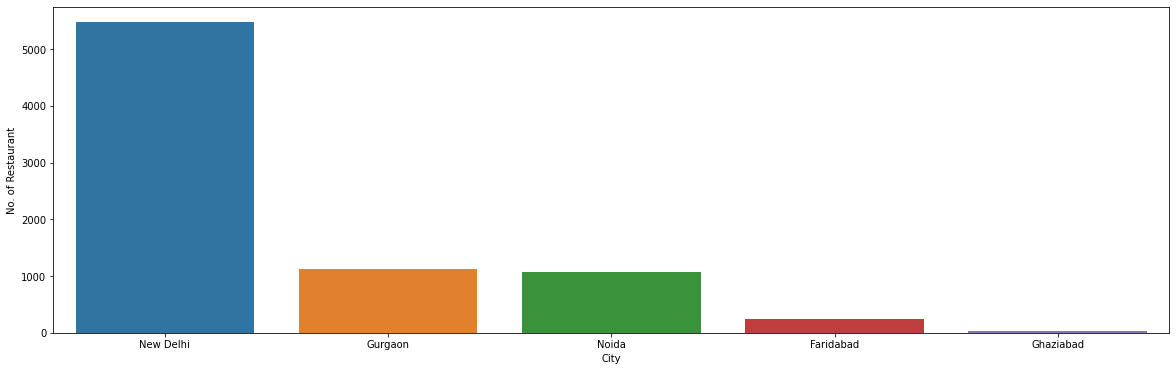

In [22]:
#Top 5 across cities
plt.rcParams['figure.figsize']=(20,6)
sns.barplot("City","No. of Restaurant",data=a.head(5))

Text(0.5, 1.0, 'Cities with least no of restaurants')

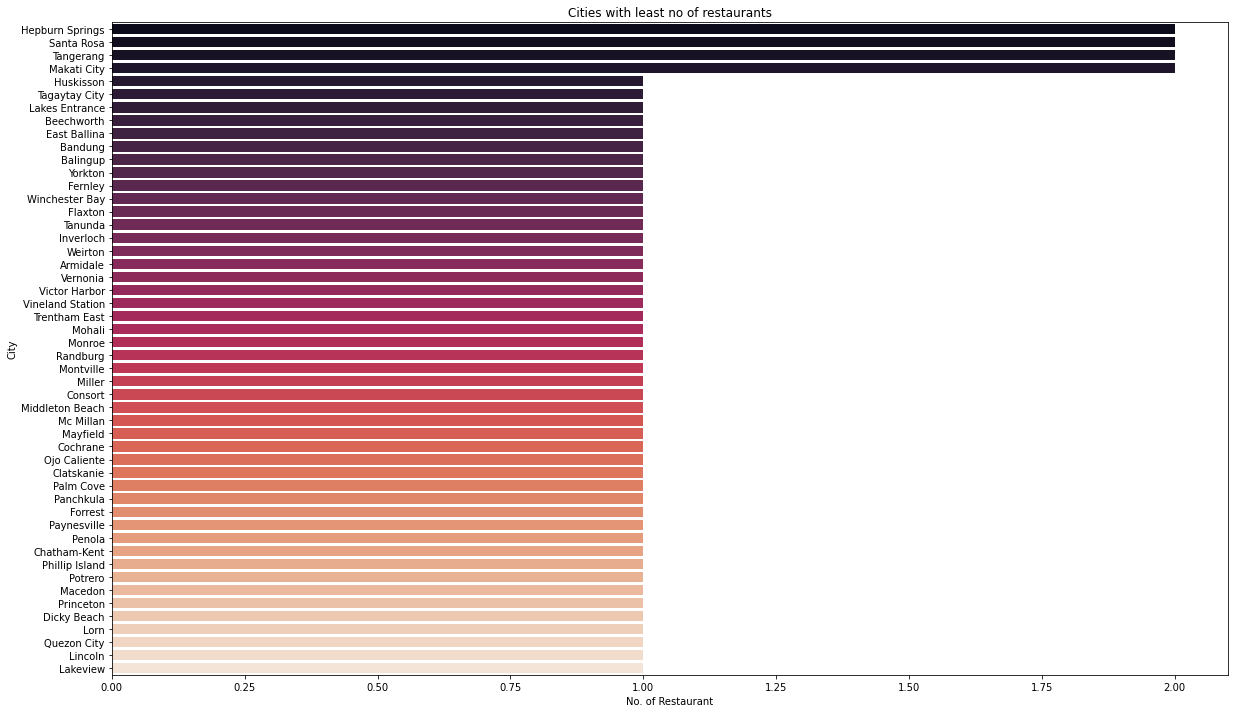

In [23]:
plt.rcParams['figure.figsize']=(20,12)
sns.barplot(x='No. of Restaurant',y='City',data=a.tail(50),palette='rocket')
plt.title("Cities with least no of restaurants")

Explore how ratings are distributed overall

In [26]:
z=df1.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"rating ct"})

In [27]:
z

,Aggregate rating,Rating color,Rating text,rating ct
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


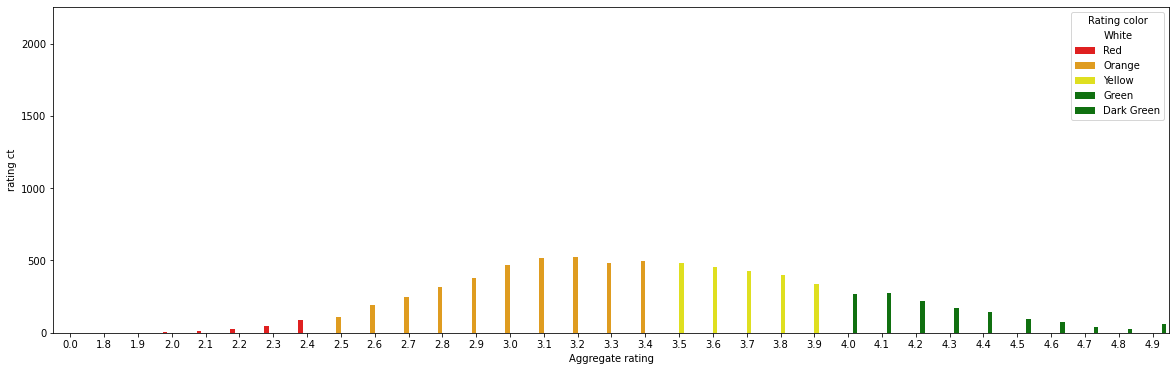

In [28]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x='Aggregate rating',y='rating ct',data=z,palette=["white","red","orange","yellow","green","green"],hue='Rating color')

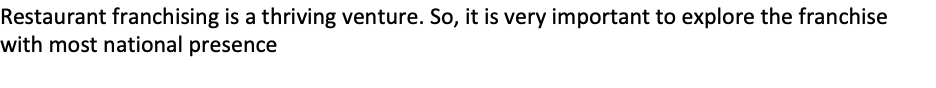

In [29]:
a=df.groupby(["Country","Restaurant Name"]).agg({ "Restaurant ID" : "count"}).reset_index().rename({"Restaurant ID" :"No. of Restaurant"},axis='columns').sort_values(by='No. of Restaurant',ascending=False) 
a

,Country,Restaurant Name,No. of Restaurant
1061,India,Cafe Coffee Day,84
1975,India,Domino's Pizza,79
5522,India,Subway,63
2486,India,Green Chick Chop,51
3689,India,McDonald's,48
...,...,...,...
2639,India,Hawai Adda,1
2637,India,Havemore,1
2636,India,Haveliram,1
2635,India,Hauz Khas Social,1


In [30]:
a["Country"].unique()

array(['India', 'United States', 'UAE', 'United Kingdom', 'Indonesia',
       'Turkey', 'Phillipines', 'Brazil', 'Australia', 'South Africa',
       'Sri Lanka', 'Singapore', 'Qatar', 'New Zealand', 'Canada'],
      dtype=object)

In [33]:
a["rank"]=a.groupby(['Country'])['No. of Restaurant'].rank(method='first',ascending=False)


In [34]:
a=a[a["rank"]==1]

In [35]:
a["Country-Restaurant"]=a["Country"]+"-"+a["Restaurant Name"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Country and Franchise with the most national presence')

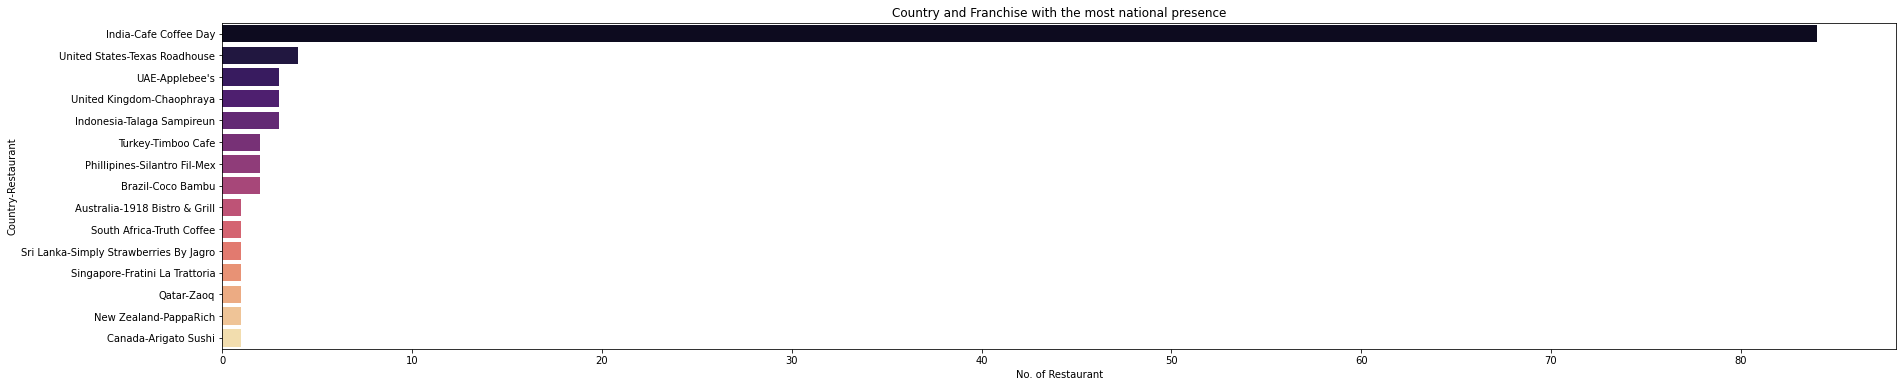

In [37]:
plt.rcParams['figure.figsize']=(30,6)
sns.barplot(x='No. of Restaurant',y='Country-Restaurant',data=a,palette='magma')
plt.title("Country and Franchise with the most national presence")


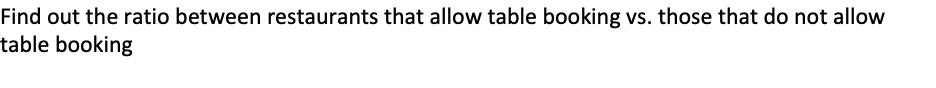

In [38]:
ratio=df.groupby("Has Table booking").agg({"Restaurant ID": "count"}).reset_index().rename({"Restaurant ID":"No. of Restaurant"},axis=1)
ratio

,Has Table booking,No. of Restaurant
0,No,8393
1,Yes,1158


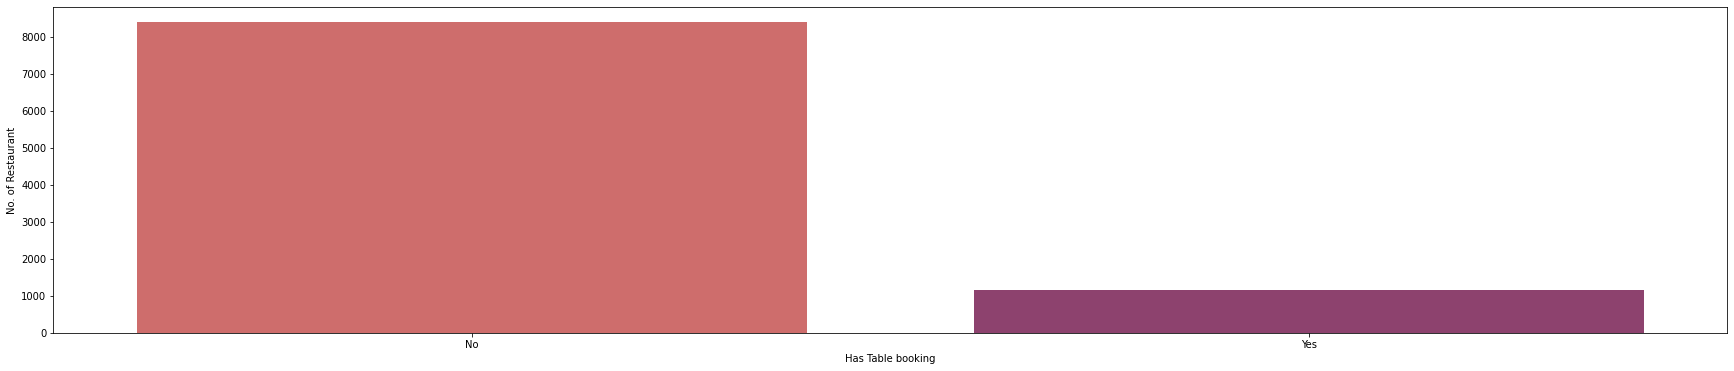

In [39]:
sns.barplot(x='Has Table booking',y='No. of Restaurant',data=ratio,palette='flare')

In [40]:
#Conclusion:  No of restaurants which provides only table booking very less as compared to the one which does not
#Ratio:0.13

In [41]:
int(ratio[ratio["Has Table booking"]=='Yes']["No. of Restaurant"])/int(ratio[ratio["Has Table booking"]=='No']["No. of Restaurant"])

0.13797211962349576

In [42]:
x=pd.DataFrame()

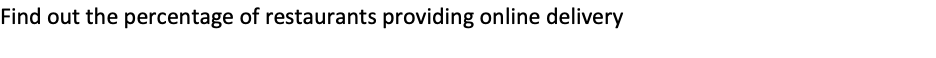

In [43]:
online=df.groupby("Has Online delivery").agg({"Restaurant ID": "count"}).reset_index().rename({"Restaurant ID":"No. of Restaurant"},axis=1)
online

,Has Online delivery,No. of Restaurant
0,No,7100
1,Yes,2451


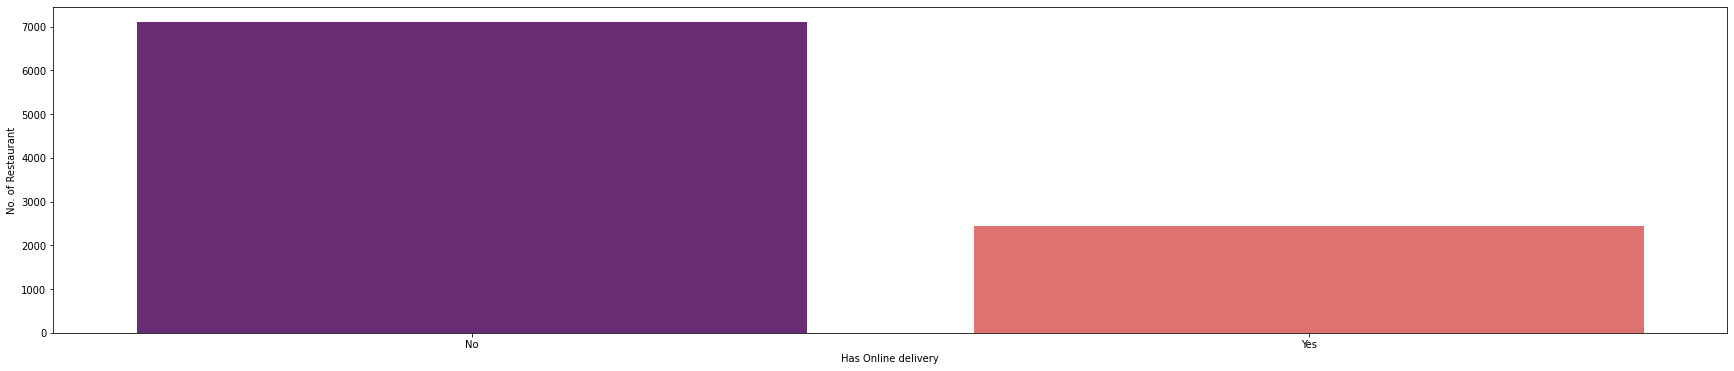

In [44]:
sns.barplot(x='Has Online delivery',y='No. of Restaurant',data=online,palette='magma')

In [45]:
int(online[online["Has Online delivery"]=='Yes']["No. of Restaurant"])/int(online[online["Has Online delivery"]=='No']["No. of Restaurant"])

0.3452112676056338

([<matplotlib.patches.Wedge at 0x7f187c7c3bd0>,
 [Text(-0.7614681082348079, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.4153462408553497, 0.4329982681343308, '74.34%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.66%')])

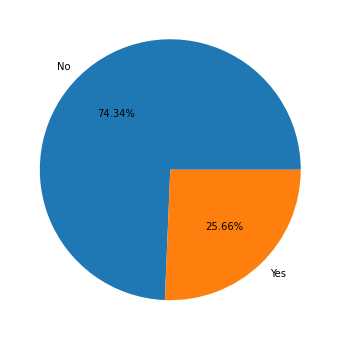

In [46]:
plt.pie(online["No. of Restaurant"],labels=online["Has Online delivery"],autopct='%1.2f%%')

In [47]:
#Conclusion:  74.34% restaurants  doesnt have online delivery 

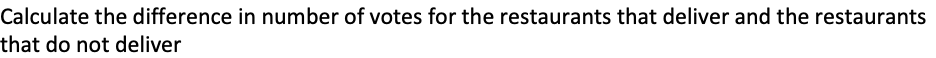

In [48]:
diff=df.groupby("Has Online delivery").agg({"Votes" :"sum"}).reset_index()
diff

,Has Online delivery,Votes
0,No,980731
1,Yes,517914


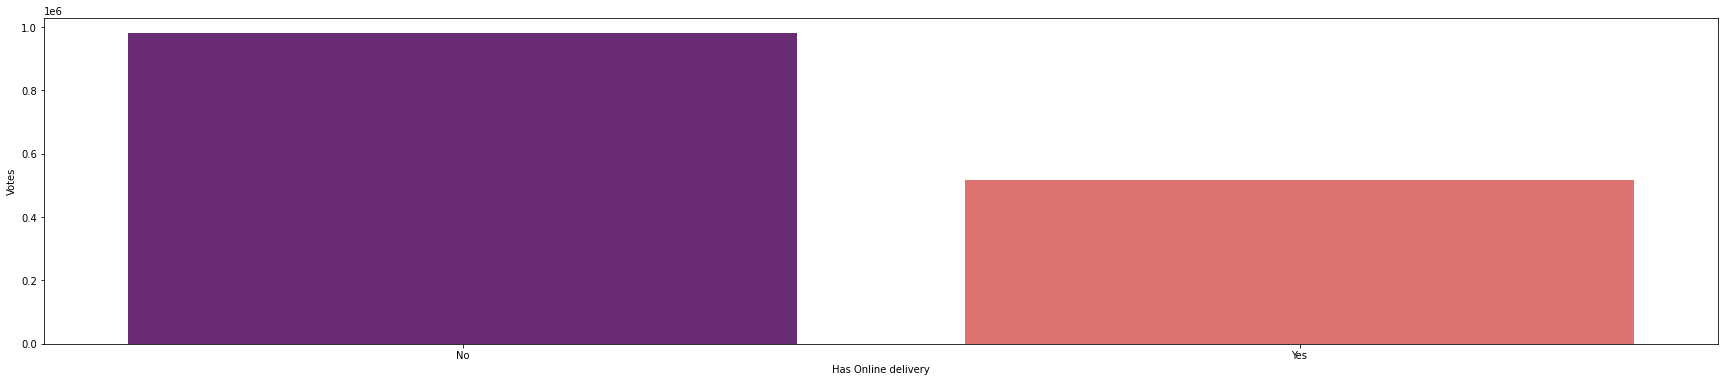

In [49]:
sns.barplot(x='Has Online delivery',y='Votes',data=diff,palette='magma')

In [50]:
int(diff[diff["Has Online delivery"]=='Yes']["Votes"])-int(diff[diff["Has Online delivery"]=='No']["Votes"])

-462817

In [51]:
#there is difference of "462817" Votes between no of votes for the restaurant that delivers and the restaurant that do not
#Surpsisingly restaurant that do not deliver has more votes

week2:**Task**







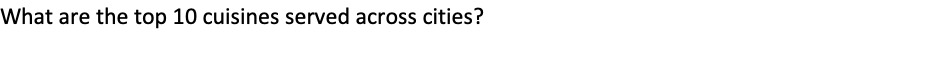

In [52]:
c=df["Cuisines"].value_counts().reset_index().head(10).rename({"index":"Cuisines","Cuisines" :"Count. of Cuisines"},axis='columns')
c

,Cuisines,Count. of Cuisines
0,North Indian,945
1,"North Indian, Chinese",511
2,Fast Food,354
3,Chinese,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


Text(0.5, 1.0, 'Top 10 cuisine acorss all the cities')

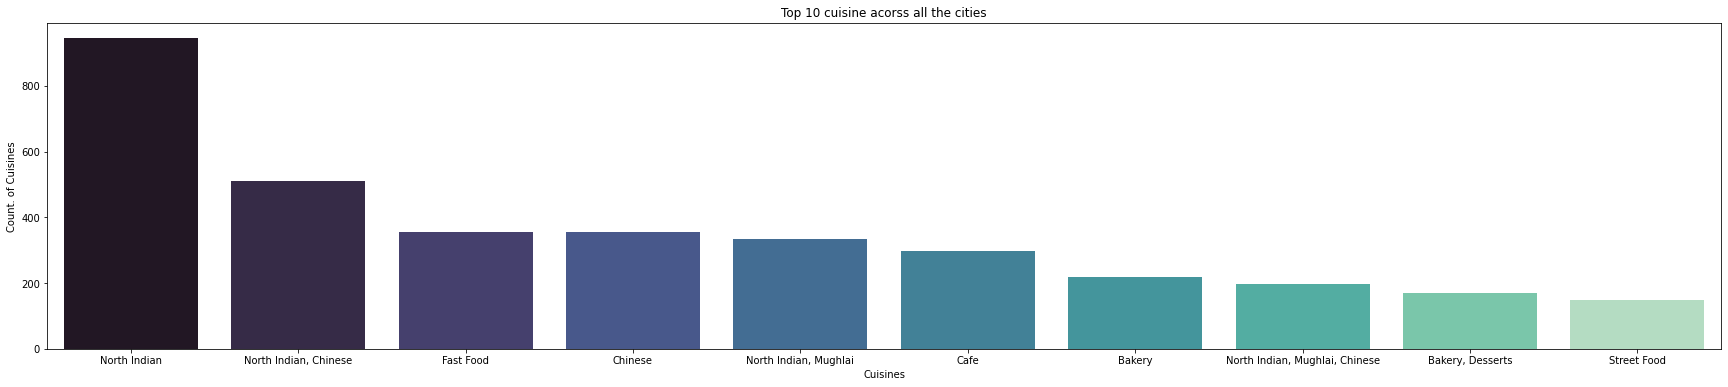

In [53]:
plt.rcParams['figure.figsize']=(30,6)
sns.barplot(x='Cuisines',y='Count. of Cuisines',data=c,palette='mako')
plt.title("Top 10 cuisine acorss all the cities")

([<matplotlib.patches.Wedge at 0x7f187c636490>,
 [Text(0.7335674636606228, 0.819682119030616, 'North Indian'),
  Text(-0.5893433631658553, 0.9288026702655193, 'North Indian, Chinese'),
  Text(-1.0695669205605947, 0.25695642129070567, 'Fast Food'),
  Text(-1.0156578084359724, -0.42242066256640176, 'Chinese'),
  Text(-0.5885167416932667, -0.9293266620229621, 'North Indian, Mughlai'),
  Text(-0.001468010939087877, -1.0999990204286014, 'Cafe'),
  Text(0.4870112613457864, -0.9863163951402139, 'Bakery'),
  Text(0.8101505161499852, -0.7440807356610658, 'North Indian, Mughlai, Chinese'),
  Text(1.0060114877036386, -0.44490548053301426, 'Bakery, Desserts'),
  Text(1.0903483121505928, -0.14539793048855149, 'Street Food')],
 [Text(0.4001277074512487, 0.44709933765306326, '26.76%'),
  Text(-0.32146001627228465, 0.5066196383266469, '14.47%'),
  Text(-0.5834001384875971, 0.14015804797674855, '10.03%'),
  Text(-0.553995168237803, -0.23041127049076454, '10.03%'),
  Text(-0.3210091318326909, -0.5069054

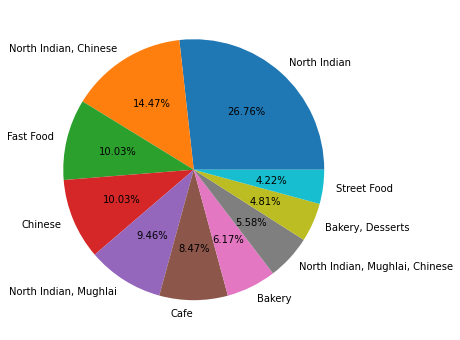

In [54]:
plt.pie(c["Count. of Cuisines"],labels=c["Cuisines"],autopct='%1.2f%%')


*********************************************************************











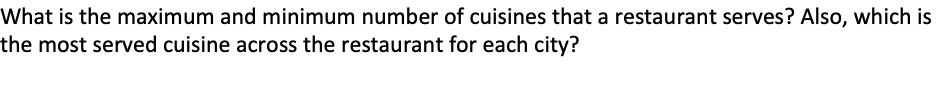

In [55]:
p=df.groupby(["City","Cuisines"]).agg({"Cuisines" :"count"}).rename({"Cuisines" :"No. of Cuisines"},axis='columns').reset_index()
p

,City,Cuisines,No. of Cuisines
0,Abu Dhabi,American,2
1,Abu Dhabi,"American, Desserts",1
2,Abu Dhabi,"American, Mexican, Seafood",1
3,Abu Dhabi,Asian,1
4,Abu Dhabi,Chinese,1
...,...,...,...
3026,€¡stanbul,Restaurant Cafe,2
3027,€¡stanbul,"Restaurant Cafe, Desserts",1
3028,€¡stanbul,"Restaurant Cafe, Turkish, Desserts",1
3029,€¡stanbul,Turkish,1


In [56]:
p["rank"]=p.groupby(['City'])['No. of Cuisines'].rank(method='first',ascending=False)
p=p[p["rank"]==1]
p

,City,Cuisines,No. of Cuisines,rank
0,Abu Dhabi,American,2,1.0
28,Agra,"North Indian, Mughlai",5,1.0
32,Ahmedabad,"Cafe, American, Continental, Armenian, Fast Food",1,1.0
66,Albany,North Indian,3,1.0
79,Allahabad,"North Indian, Chinese",3,1.0
...,...,...,...,...
3000,Weirton,"Burger, Greek, Sandwich",1,1.0
3003,Wellington City,Cafe,3,1.0
3018,Winchester Bay,"Burger, Seafood, Steak",1,1.0
3019,Yorkton,Asian,1,1.0


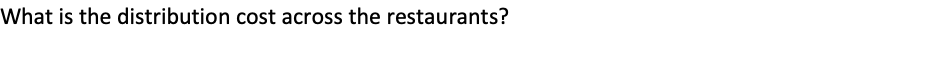

In [57]:
df_cost=df.groupby("Restaurant Name").agg({"Average Cost for two" :"mean"}).reset_index().sort_values(by='Average Cost for two',ascending=True)

In [58]:
df_cost

,Restaurant Name,Average Cost for two
1746,Cookie Shoppe,0.0
486,Atmosphere Grill Cafe Sheesha,0.0
2808,HI Lite Bar & Lounge,0.0
2852,Happy Joe's Pizza & Ice Cream,0.0
511,Azteca,0.0
...,...,...
505,Avec Moi Restaurant and Bar,350000.0
41,3 Wise Monkeys,450000.0
6170,Sushi Masa,500000.0
5897,Skye,800000.0


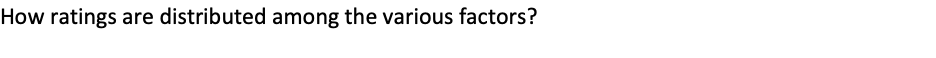

In [59]:
df_rating=df[df["Aggregate rating"]==0]

In [60]:
df_rating["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [61]:
#most zero ratings is from India might be casue of the busines also reside in india acc to this data

In [62]:
df_rating["City"].value_counts()

New Delhi         1425
Noida              384
Gurgaon            228
Faridabad          100
SÌ£o Paulo           3
Ghaziabad            2
Davenport            2
Rio de Janeiro       1
BrasÌ_lia            1
Pocatello            1
Birmingham           1
Name: City, dtype: int64

In [63]:
#at city granularity max zero rating in from New Delhi

In [64]:
df_rating["Restaurant Name"].value_counts()

Cafe Coffee Day            16
Baskin Robbins             12
Aggarwal Sweets            10
Bikaner Sweets              7
Green Chick Chop            7
                           ..
Gurgaon Mughlai Chicken     1
Shree Shyam Bhojnalaya      1
Best Pizza Hut              1
The Burger Chef             1
Damascena Coffee House      1
Name: Restaurant Name, Length: 1947, dtype: int64

In [65]:
# max zero rating is for CCD

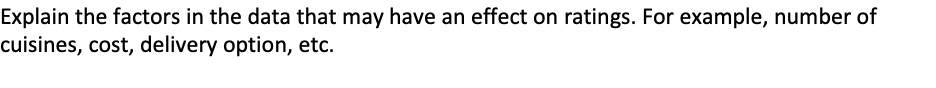

In [67]:
df["Rating text"].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [68]:
price=df.groupby(["Price range","Rating text"]).agg({"Rating text" :"count"}).rename({"Rating text":"ct of text"},axis='columns').reset_index()
price

,Price range,Rating text,ct of text
0,1,Average,1898
1,1,Excellent,32
2,1,Good,608
3,1,Not rated,1700
4,1,Poor,62
5,1,Very Good,144
6,2,Average,1425
7,2,Excellent,69
8,2,Good,794
9,2,Not rated,402


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


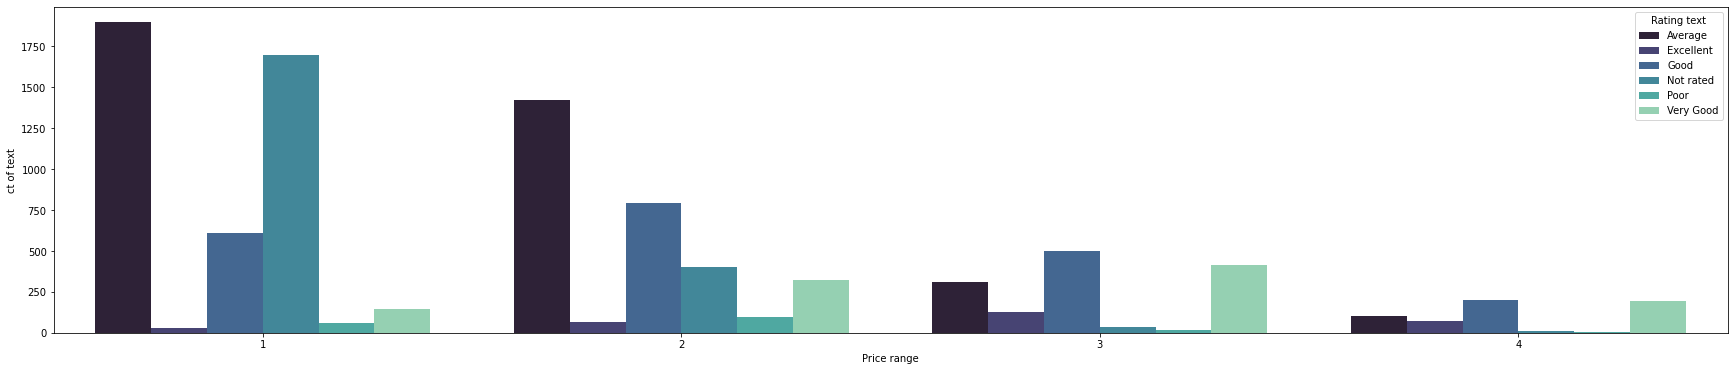

In [69]:
sns.barplot("Price range","ct of text",hue='Rating text',data=price,palette='mako')

In [70]:
#Conclusion:Bad rating is max for cheap/low range restaurants 

In [71]:
delivery=df.groupby(["Has Online delivery","Rating text"]).agg({"Rating text" :"count"}).rename({"Rating text":"ct of text"},axis='columns').reset_index()
delivery

,Has Online delivery,Rating text,ct of text
0,No,Average,2632
1,No,Excellent,262
2,No,Good,1282
3,No,Not rated,2052
4,No,Poor,70
5,No,Very Good,802
6,Yes,Average,1105
7,Yes,Excellent,39
8,Yes,Good,818
9,Yes,Not rated,96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


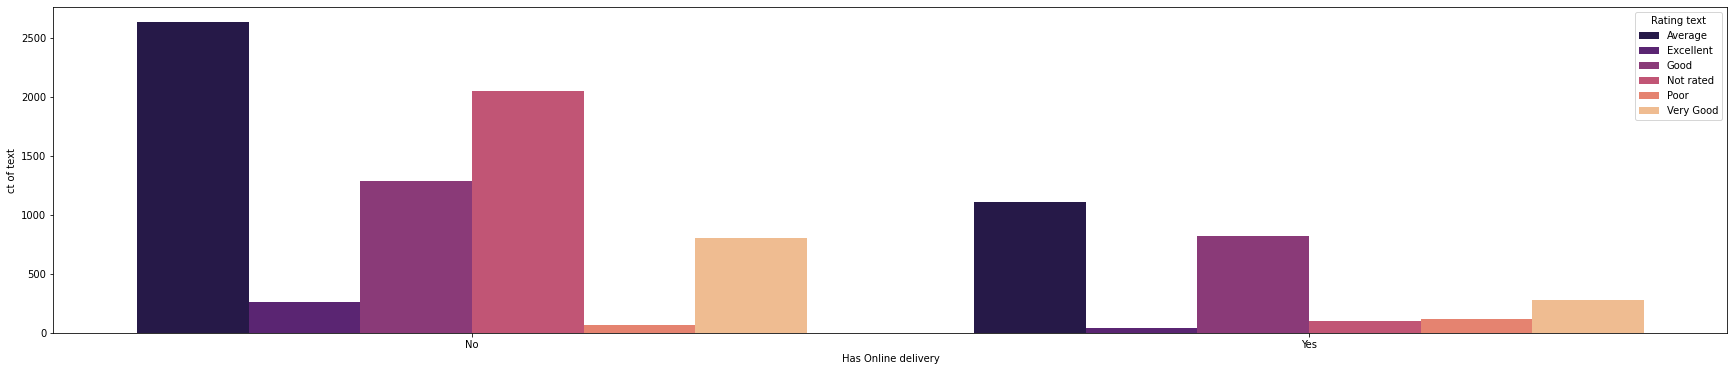

In [72]:
sns.barplot("Has Online delivery","ct of text",hue='Rating text',data=delivery,palette='magma')

In [73]:
#Restaurants which didnt have only deliver has bad /poor ratings

In [74]:
table=df.groupby(["Has Table booking","Rating text"]).agg({"Rating text" :"count"}).rename({"Rating text":"ct of text"},axis='columns').reset_index()
table

,Has Table booking,Rating text,ct of text
0,No,Average,3343
1,No,Excellent,256
2,No,Good,1694
3,No,Not rated,2101
4,No,Poor,162
5,No,Very Good,837
6,Yes,Average,394
7,Yes,Excellent,45
8,Yes,Good,406
9,Yes,Not rated,47


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


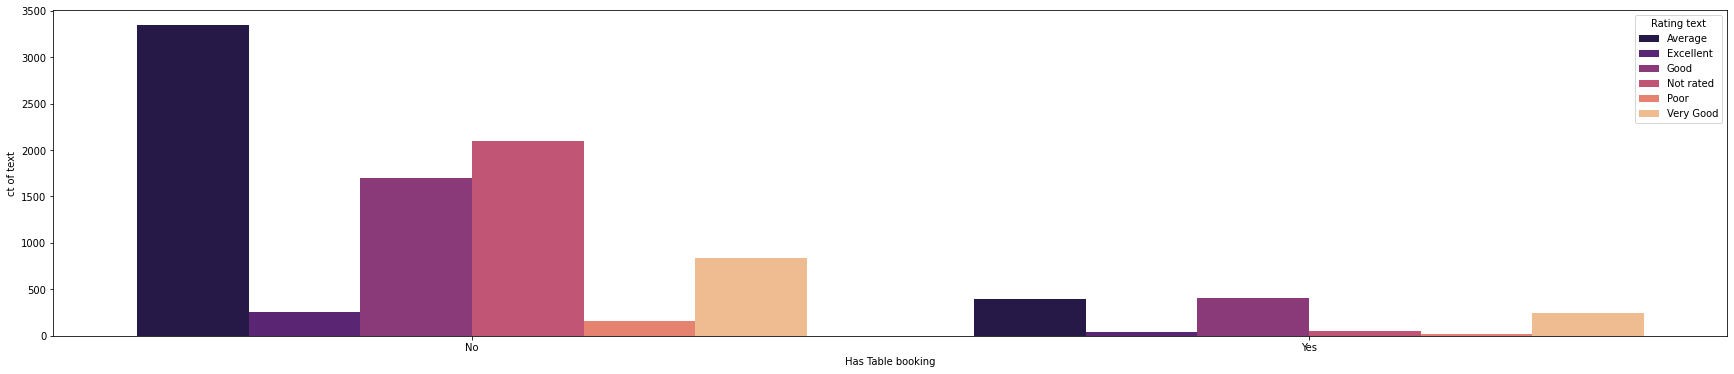

In [75]:
sns.barplot("Has Table booking","ct of text",hue='Rating text',data=table,palette='magma')

In [76]:
#Conclusion:Since percentage of restaurants which do not have table booking option hence ratings are also biased but only within those also average rating is quite high for those

In [ ]:
df.to_csv('restaurant.csv')